Laptop Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#1. Collecting Data
full_data = pd.read_csv("./Data/laptop_price.csv", encoding='ISO-8859-1')
full_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
#2. Cleaning and Organizing Data
def update_storage(x):
    storages=x['Memory'].split('+')
    for storage in storages:
        storage=storage.strip( ).split(' ',1)
        x[storage[1]+' (GB)']+=float(storage[0].replace('GB','')) if 'GB' in storage[0] else float(storage[0].replace('TB',''))*1024
    return x

full_data['SSD (GB)']=full_data['HDD (GB)']=full_data['Hybrid (GB)']=full_data['Flash Storage (GB)']=0
full_data=full_data.apply(update_storage,axis=1)

In [4]:
# Convert weight, ram to numeric and derive speed from cpu
full_data['Weight (kg)']=pd.to_numeric(full_data['Weight'].apply(lambda x: (x.replace('kg',''))))
full_data['Ram (GB)']=pd.to_numeric(full_data['Ram'].apply(lambda x: (x.replace('GB',''))))
full_data['Speed (Ghz)']=pd.to_numeric(full_data['Cpu'].apply(lambda x: (x.split()[-1].replace('GHz',''))))

In [5]:
# Remove speed from cpu
import re
regex_cpu = re.compile(r'([A-Z\d]+[A-Za-z\d\-]+)$')
full_data['Cpu']=full_data['Cpu'].str.split(' ').str[0:-1].apply(' '.join).str.replace(regex_cpu,'', regex=True)

In [6]:
# Rename and Drop processed columns
full_data['Resolution']=full_data['ScreenResolution']
full_data.drop(columns=['laptop_ID','Weight','Ram','Memory','ScreenResolution'],inplace=True)
full_data.head()

,Company,Product,TypeName,Inches,Cpu,Gpu,OpSys,Price_euros,SSD (GB),HDD (GB),Hybrid (GB),Flash Storage (GB),Weight (kg),Ram (GB),Speed (Ghz),Resolution
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,Intel Iris Plus Graphics 640,macOS,1339.69,128.0,0.0,0.0,0.0,1.37,8,2.3,IPS Panel Retina Display 2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,Intel HD Graphics 6000,macOS,898.94,0.0,0.0,0.0,128.0,1.34,8,1.8,1440x900
2,HP,250 G6,Notebook,15.6,Intel Core i5,Intel HD Graphics 620,No OS,575.00,256.0,0.0,0.0,0.0,1.86,8,2.5,Full HD 1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,AMD Radeon Pro 455,macOS,2537.45,512.0,0.0,0.0,0.0,1.83,16,2.7,IPS Panel Retina Display 2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,Intel Iris Plus Graphics 650,macOS,1803.60,256.0,0.0,0.0,0.0,1.37,8,3.1,IPS Panel Retina Display 2560x1600


In [7]:
# Set target column
target_col='Price_euros'

In [8]:
#2.1 Visualizations

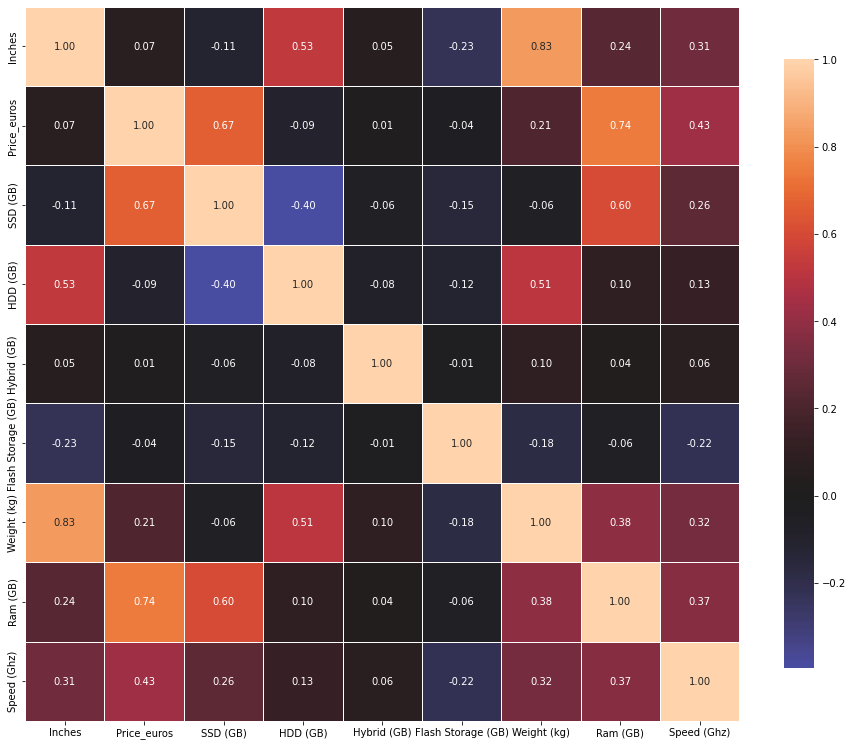

In [9]:
import seaborn as sb
def correlation_heatmap(train):
    correlations = train.corr(method='pearson')
    
    fig, ax = plt.subplots(figsize=(16,16))
    sb.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()

correlation_heatmap(full_data)

In [10]:
# Create average for text based columns
avg_price_by_company = full_data.groupby("Company").mean()[target_col].sort_values(ascending=False)
avg_price_by_type = full_data.groupby("TypeName").mean()[target_col].sort_values(ascending=False)
avg_price_by_os = full_data.groupby("OpSys").mean()[target_col].sort_values(ascending=False)
avg_price_by_cpu = full_data.groupby("Cpu").mean()[target_col].sort_values(ascending=False)

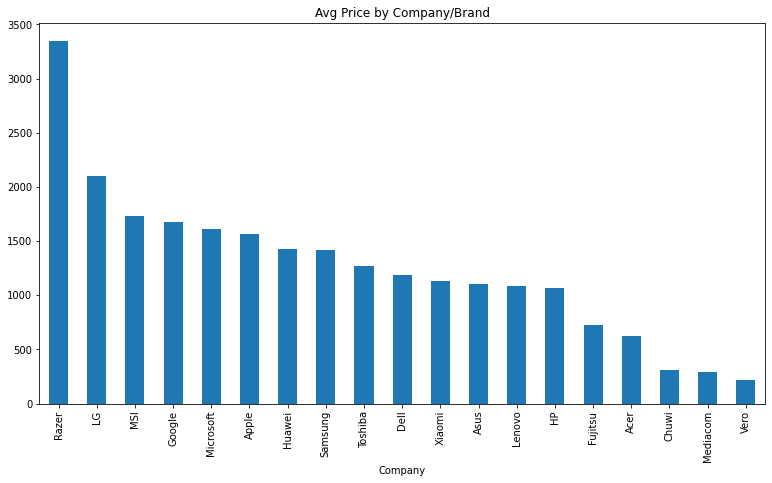

In [11]:
# Display Company plot
fig, ax = plt.subplots(nrows=1, figsize=(13,7))
avg_price_by_company.plot(ax=ax, kind='bar')
ax.set_title('Avg Price by Company/Brand')
fig;

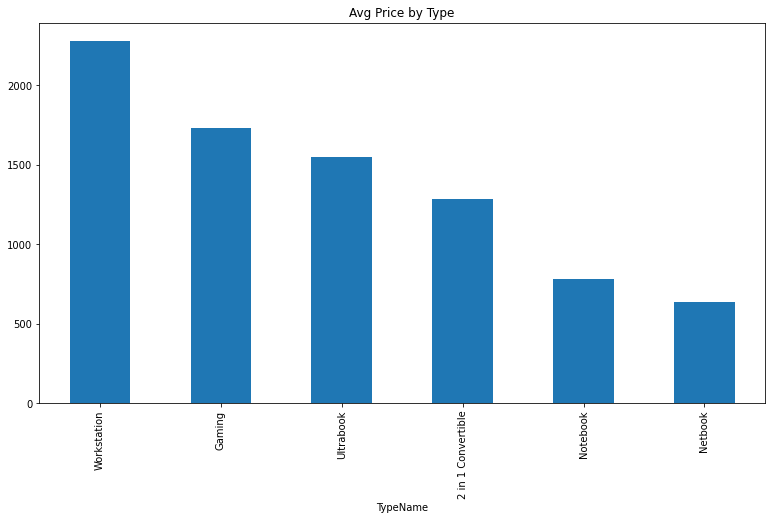

In [12]:
# Display Type plot
fig, ax = plt.subplots(nrows=1, figsize=(13,7))
avg_price_by_type.plot(ax=ax, kind='bar')
ax.set_title('Avg Price by Type')
fig;

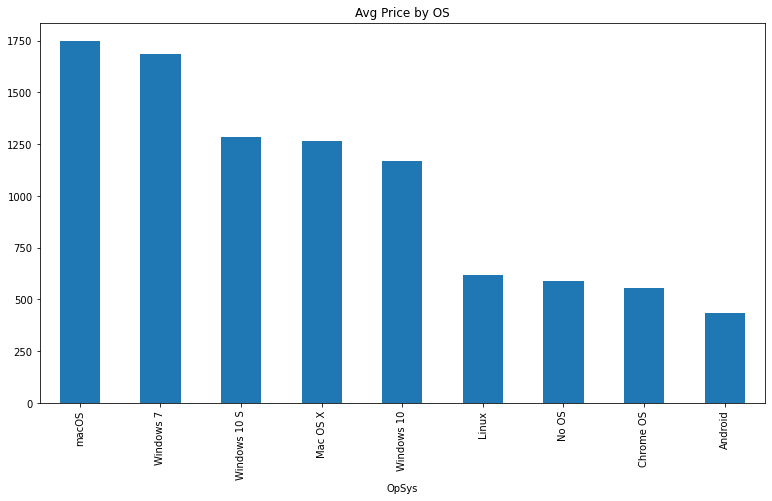

In [13]:
# Display OS plot
fig, ax = plt.subplots(nrows=1, figsize=(13,7))
avg_price_by_os.plot(ax=ax, kind='bar')
ax.set_title('Avg Price by OS')
fig;

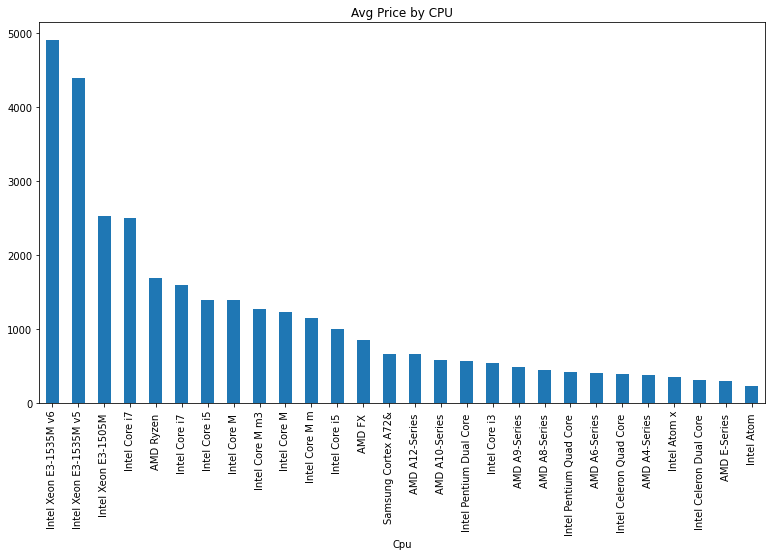

In [14]:
# Display CPU plot
fig, ax = plt.subplots(nrows=1, figsize=(13,7))
avg_price_by_cpu.plot(ax=ax, kind='bar')
ax.set_title('Avg Price by CPU')
ax.xlimit=[0, 50]
fig;

In [15]:
#  2.2 Train-test-validation split

In [16]:
# Encode text based data to numeric data
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encode_cols=full_data.select_dtypes(exclude=np.number).columns.tolist()
for col in encode_cols:
    full_data[col] = encoder.fit_transform(full_data[col])
full_data.head()

,Company,Product,TypeName,Inches,Cpu,Gpu,OpSys,Price_euros,SSD (GB),HDD (GB),Hybrid (GB),Flash Storage (GB),Weight (kg),Ram (GB),Speed (Ghz),Resolution
0,1,300,4,13.3,18,58,8,1339.69,128.0,0.0,0.0,0.0,1.37,8,2.3,23
1,1,301,4,13.3,18,51,8,898.94,0.0,0.0,0.0,128.0,1.34,8,1.8,1
2,7,50,3,15.6,19,53,4,575.00,256.0,0.0,0.0,0.0,1.86,8,2.5,8
3,1,300,4,15.4,20,9,8,2537.45,512.0,0.0,0.0,0.0,1.83,16,2.7,25
4,1,300,4,13.3,18,59,8,1803.60,256.0,0.0,0.0,0.0,1.37,8,3.1,23


In [17]:
# Split target column from full data
y = full_data[target_col]
x = full_data.drop(target_col,axis=1,errors="ignore")

In [18]:
# Remove outliers from the data
from sklearn.neighbors import LocalOutlierFactor
lof =  LocalOutlierFactor(contamination=0.05, n_jobs=-1)
y_pred = lof.fit_predict(x)
x = x[y_pred==1]
y = y[y_pred==1]

In [19]:
# Split train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10,random_state=1)
print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(1113, 15)
(1113,)
(124, 15)
(124,)


(None, None)

3. Feature Engineering

In [20]:
# Train different models with same train data
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from time import time

start=time()
# Gradient Boosting
gb = GradientBoostingRegressor(random_state=1)
param_dist = {
  'n_estimators' : [3000,2500,],
  'ccp_alpha'    : [0.1,0.2,0.5],
  'subsample'    : [0.1,0.2,0.5]
}

cv=GridSearchCV( gb, param_grid=param_dist,n_jobs = -1,scoring=('r2','neg_mean_squared_error'),refit='r2')
cv.fit(x_train,y_train)
print( "GridSearchCV took %.2f seconds" % ((time() - start)))
cv.best_estimator_

GridSearchCV took 36.32 seconds


GradientBoostingRegressor(ccp_alpha=0.2, n_estimators=2500, random_state=1,
                          subsample=0.5)

In [21]:
# Predict from test data with different models and select best scoring model
from sklearn.metrics import r2_score
y_pred = cv.predict(x_test)
score = round(r2_score(y_test,y_pred)*100, 2)
print(f"{cv.best_estimator_}: Score " + str(score) +"%")

GradientBoostingRegressor(ccp_alpha=0.2, n_estimators=2500, random_state=1,
                          subsample=0.5): Score 95.5%


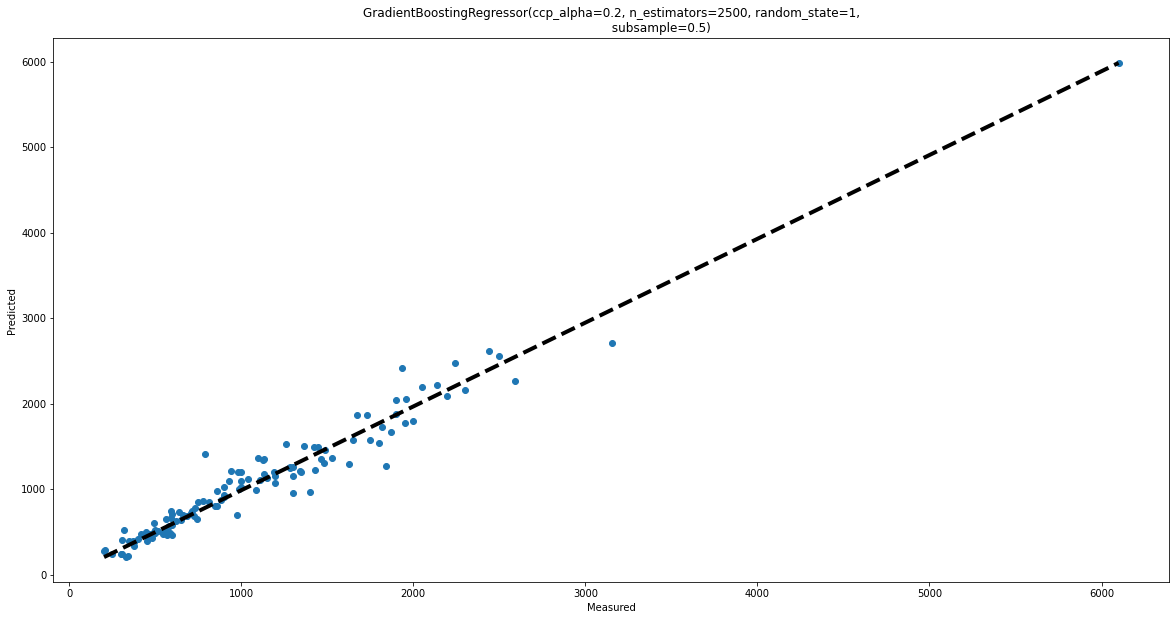

In [22]:
# Plot predicted and measured data for the best performing model
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title(cv.best_estimator_)
plt.show()

<AxesSubplot:>

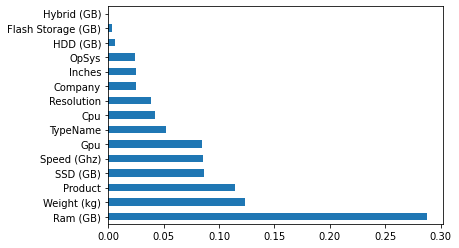

In [23]:
# Display important features
feature_importances = pd.Series(cv.best_estimator_.feature_importances_, index=x.columns)
feature_importances.nlargest(20).plot(kind='barh')

In [30]:
import xgboost as xgb
from xgboost import XGBRegressor
model = XGBRegressor(
    max_depth=3,
    n_estimators=2500,
    colsample_bytree=0.5, 
    eta=0.1,
    n_jobs=-1,
    seed=42)
model.fit(
    x_train, 
    y_train, 
    eval_metric="rmse")
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
score = round(r2_score(y_test,y_pred)*100, 2)
print(f"{model}: Score " + str(score) +"%")

/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None): Score 95.42%
